<a href="https://colab.research.google.com/github/JAEJOON-LEE/data_mining/blob/main/dataMining_term1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import os, sys
import warnings

In [ ]:
#load dataset
data = pd.read_csv('/Churn_Modelling.csv')

data.head()

#Exited -> 0 or 1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#descriptions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#statistics of this data
stats = data.describe()
stats


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#불필요한 feature 삭제
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# #나중에 쓸 train, test data
# train, test = train_test_split(data, test_size=0.2)

# print(train.shape)
# print(test.shape)

0    7963
1    2037
Name: Exited, dtype: int64


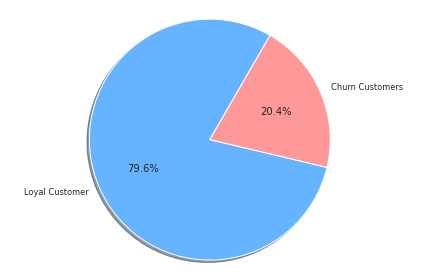

In [ ]:
#Exited ratio
ExitedValues = data.Exited.value_counts()
print(ExitedValues)

labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


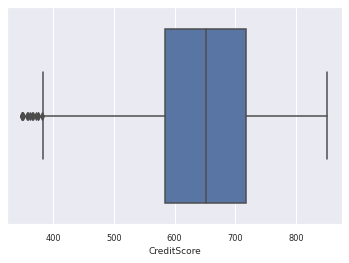

In [ ]:
# CreditScore
sns.boxplot(data['CreditScore'] , orient = "h")

# 400이하 outlier

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

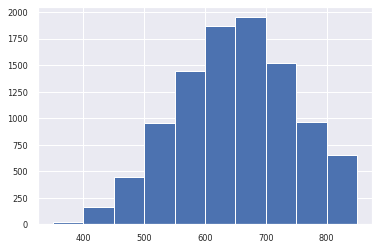

In [ ]:
plt.hist(data['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


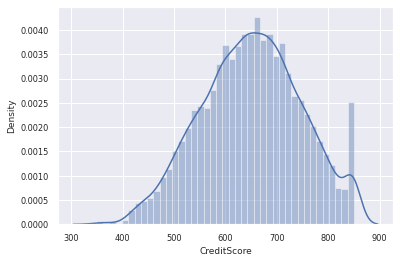

In [ ]:
sns.distplot(data['CreditScore'])

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

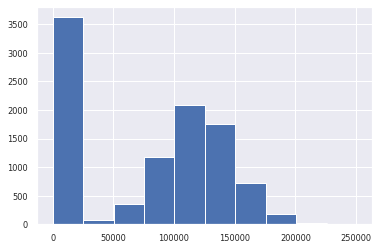

In [ ]:
plt.hist(data['Balance'])

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

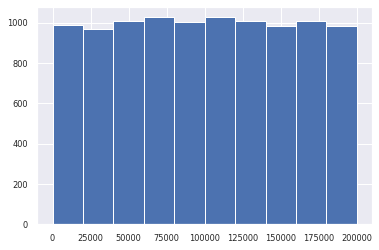

In [ ]:
plt.hist(data['EstimatedSalary'])

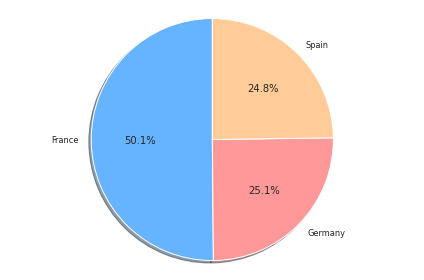

In [ ]:
#Geography ratio
Geosplit = data.Geography.value_counts()
Geovalues  = data['Geography'].value_counts().values.tolist()
Geolabels  = data['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 

f2.axis('equal')
plt.tight_layout()
plt.show()

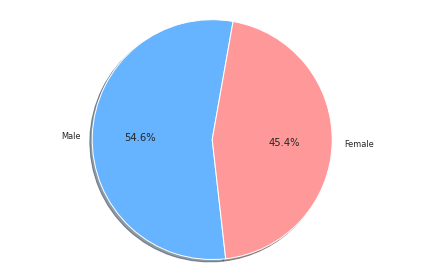

In [ ]:
#gender ratio
Gendervalues  = data['Gender'].value_counts().values.tolist()
GenderLabels = data['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 

f3.axis('equal')
plt.tight_layout()
plt.show()

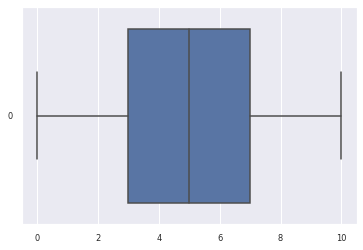

In [ ]:
sns.boxplot(data= data['Tenure'], orient="h")

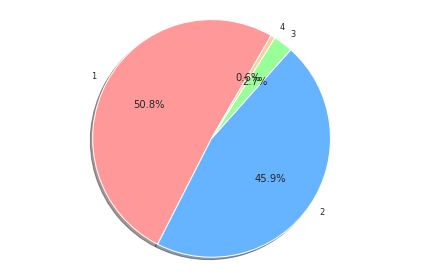

In [ ]:
 #number ratio
NumOfProdsvalues  = data['NumOfProducts'].value_counts().values.tolist()
NumOfProdslabels  = data['NumOfProducts'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(NumOfProdsvalues ,labels=NumOfProdslabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

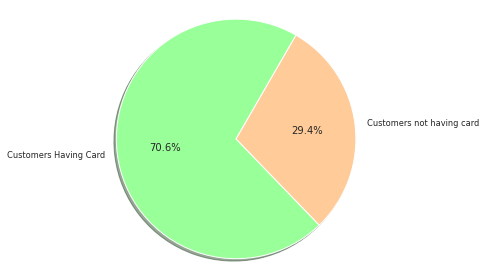

In [ ]:
#whether one has a credit card
HasCardvalues  = data['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Customers Having Card" , "Customers not having card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


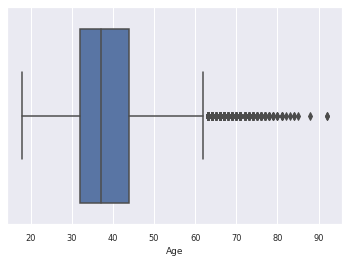

In [ ]:
sns.boxplot(data['Age'] , orient = "h")

#outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


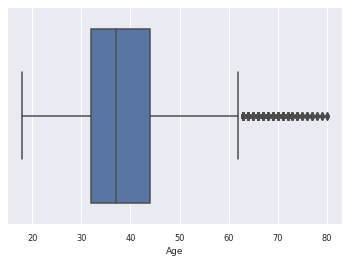

In [ ]:
#handle outliers

ageChange = []
for val in data.Age:
    if val <= 80:
        ageChange.append(val)
    else:
        ageChange.append(data.Age.median())
        
data.Age = ageChange

sns.boxplot(data['Age'] , orient = "h")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


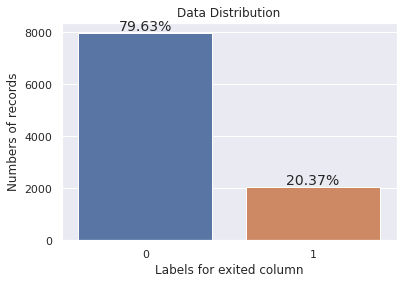

In [ ]:
total_len = len(data['Exited'])
sns.set()
sns.countplot(data.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

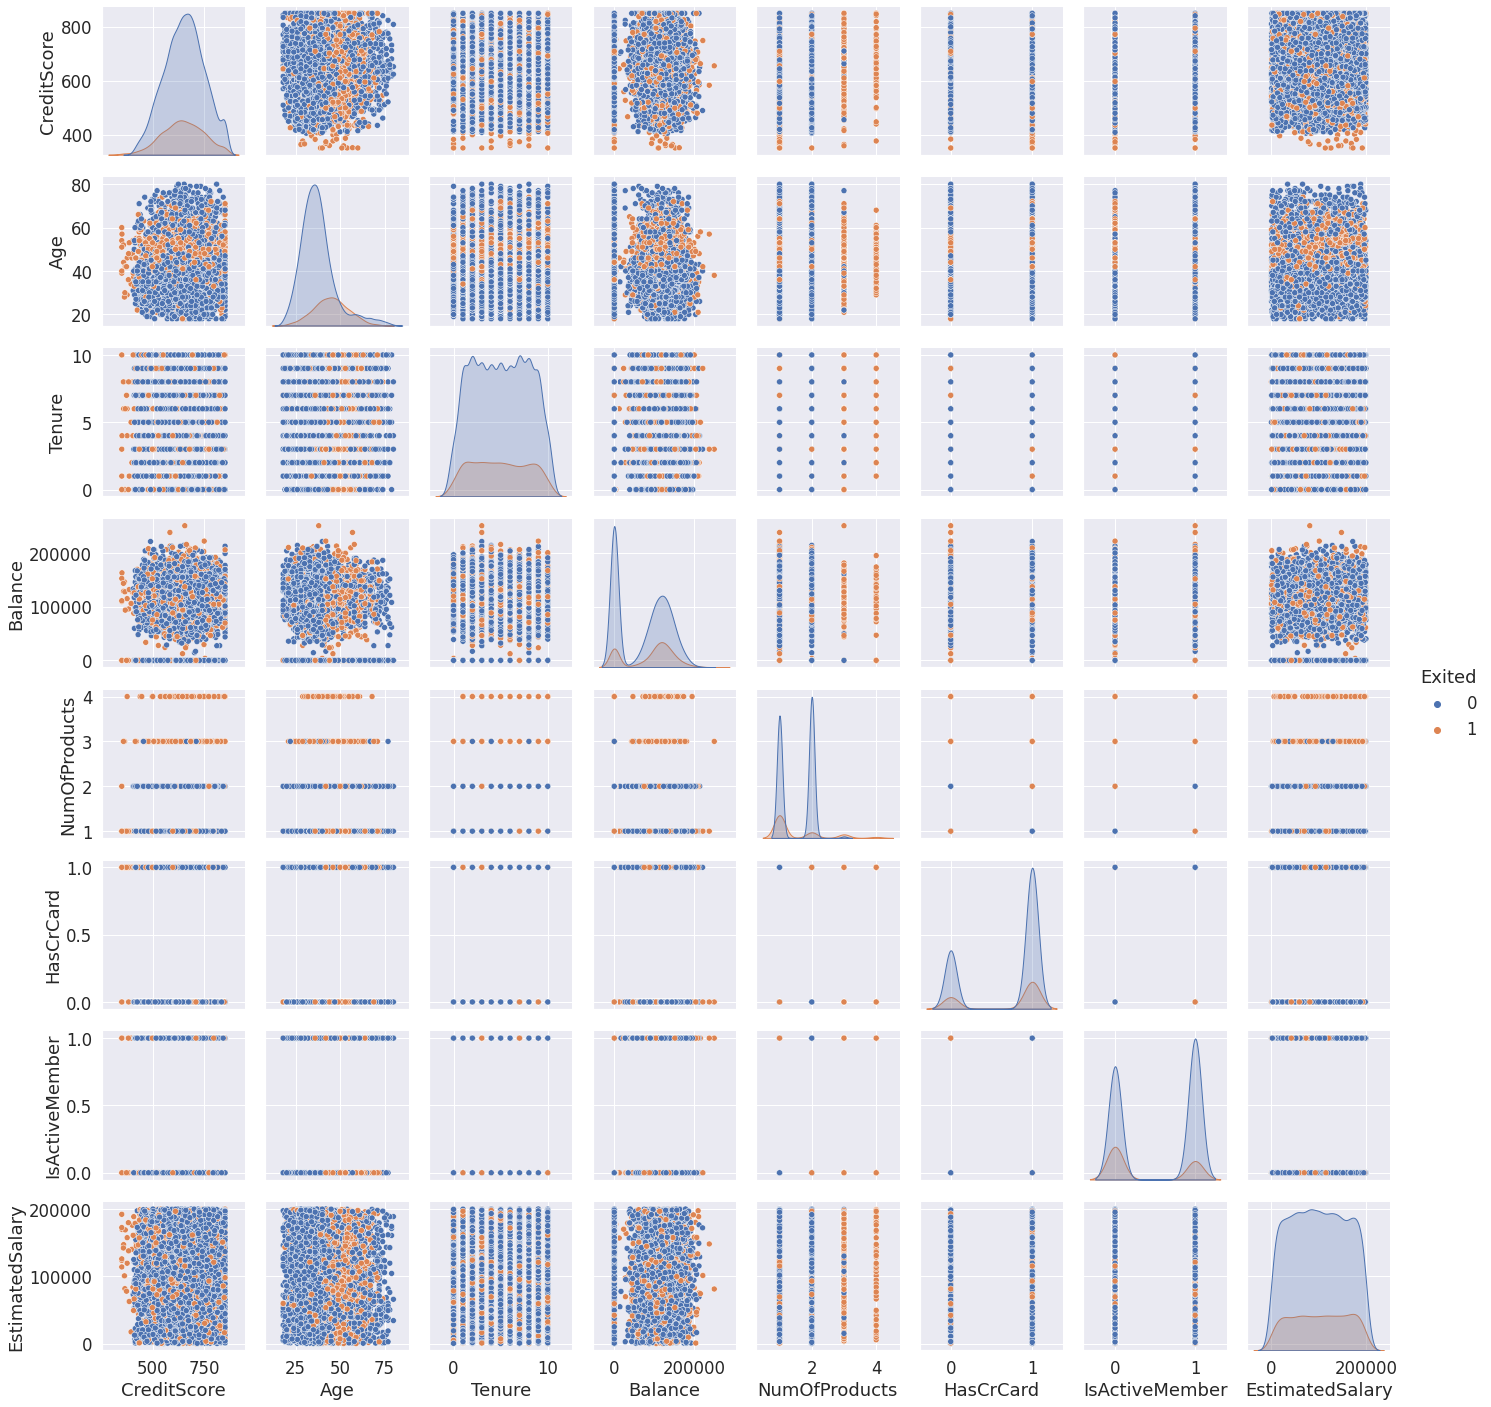

In [ ]:
sns.pairplot(data, hue = 'Exited')

In [ ]:
#상관계수

data[data.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.005660,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.005660,1.000000,-0.010989,0.030256,-0.031514,-0.011325,0.082037,-0.007952,0.290291
Tenure,0.000842,-0.010989,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.030256,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.031514,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011325,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.082037,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007952,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.290291,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


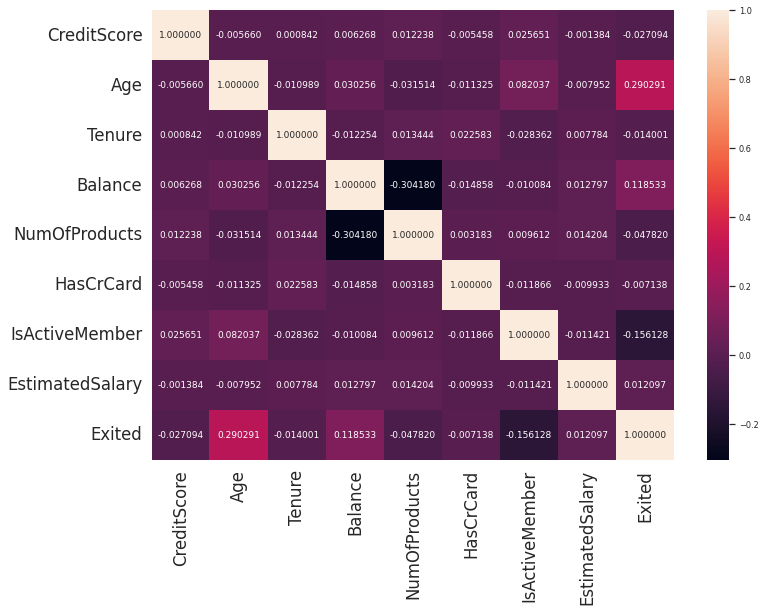

In [ ]:
#히트맵

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(data.corr(), annot = True, fmt = ".6f")
plt.show()